In [602]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


In [603]:
df = pd.read_csv("/content/drive/MyDrive/campus x /Capstone Project /gurgaon_properties_cleaned_v1.csv")

In [604]:
df.head(5)

,society,price,sector,price_per_sqft,area,property_type,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,ireo victory valley,2.99,sector 67,11832.0,2527.000,flat,Super Built up area 2527(234.77 sq.m.)Built Up...,3.0,3.0,3,servant room,4.0,East,1 to 5 Year Old,"['AIPL Joy Street Mall', 'Golf Course Extensio...","['3 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 St...","['Security / Fire Alarm', 'Intercom Facility',..."
1,signature global park,0.58,sohna road,7056.0,822.000,flat,Built Up area: 822 (76.37 sq.m.)Carpet area: 6...,2.0,2.0,2,not available,3.0,NaN,undefined,"['Sector 55-56 metro', 'Global city centre', '...",NaN,NaN
2,chd avenue,0.95,sector 71,7917.0,1200.000,flat,Built Up area: 1200 (111.48 sq.m.),2.0,2.0,0,not available,5.0,South,undefined,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN
3,ansal maple heights,1.50,sector 43,12658.0,1185.000,flat,Super Built up area 1400(130.06 sq.m.)Built Up...,3.0,3.0,3+,store room,7.0,North-East,10+ Year Old,"['Huda city centre metro station', 'Iffco chow...","['3 Wardrobe', '1 Water Purifier', '10 Fan', '...","['Centrally Air Conditioned', 'Water purifier'..."
4,sector 15 part 2 rwa,10.00,sector 15,22222.0,4500.045,house,Plot area 502(419.74 sq.m.),5.0,5.0,2,Not Available,2.0,East,10+ Year Old,"['Hanuman Mandir', 'State bank of india ATM', ...",[],"['Feng Shui / Vaastu Compliant', 'Private Gard..."


#Dealing with 'area' and 'areaWithType' column

areaWithType column is not consistent because it consists the area in 4 forms i.e super built up or carpet or built up or plot hence the area column becomes unreliable.

To solve this problem we will split the areaWithType column into 3 columns. so we will assign seperate column for each type of area

Also the unit of area is not consistent, its is in sqft or sq.m or yards. we will keep the area in sq.ft

In [605]:
df[['area', 'areaWithType']].head()

,area,areaWithType
0,2527.000,Super Built up area 2527(234.77 sq.m.)Built Up...
1,822.000,Built Up area: 822 (76.37 sq.m.)Carpet area: 6...
2,1200.000,Built Up area: 1200 (111.48 sq.m.)
3,1185.000,Super Built up area 1400(130.06 sq.m.)Built Up...
4,4500.045,Plot area 502(419.74 sq.m.)


In [606]:
# Extract the super built up area from areaWithType column
def extract_super_built_up (x):
  pattern = r"Super Built up area ([-+]?\d*\.\d+|\d+)\(([-+]?\d*\.\d+|\d+) sq\.m\.\)"
  match = re.search(pattern, x)
  if match:
   return float(match.group(1))
  else:
    return None

# Extract the built up area from areaWithType column
def extract_built_up (x):
  pattern_1 = r"Built Up area: ([-+]?\d*\.\d+|\d+) sq\.ft\. \((\d+\.\d+) sq\.m\.\)"
  pattern_2 = r"Built Up area: ([-+]?\d*\.\d+|\d+) \((\d+\.\d+) sq\.m\.\)"
  pattern_3 = r"Built Up area: ([-+]?\d*\.\d+|\d+) sq\.yards\ \((\d+\.\d+) sq\.m\.\)"
  match_1 = re.search(pattern_1, x)
  match_2 = re.search(pattern_2, x)
  match_3 = re.search(pattern_3, x)
  if match_1:
   return float(match_1.group(1))
  elif match_2:
   return float(match_2.group(1))
  elif match_3:
   return float(match_3.group(1))*9.0
  else:
   return None

# Extract the Carpet area from areaWithType column
def carpet (x):
  pattern_1 = r"Carpet area: ([-+]?\d*\.\d+|\d+) sq\.ft\. \((\d+\.\d+) sq\.m\.\)"
  pattern_2 = r"Carpet area: ([-+]?\d*\.\d+|\d+) \((\d+\.\d+) sq\.m\.\)"
  pattern_3 = r'Carpet area: ([-+]?\d*\.\d+|\d+)\s*sq\.yards'
  pattern_4 = r"Carpet area: ([-+]?\d*\.\d+|\d+) sq\.ft\."
  match_1 = re.search(pattern_1, x)
  match_2 = re.search(pattern_2, x)
  match_3 = re.search(pattern_3, x)
  match_4 = re.search(pattern_4, x)
  if match_1:
   return float(match_1.group(1))
  elif match_2:
   return float(match_2.group(1))
  elif match_3:
   return float(match_3.group(1))*9.0
  elif match_4:
   return  float(match_4.group(1))
  else:
   return None

In [607]:
#convert from sq.m. to sq.ft.
def convert_to_sqft(text, area_value):
  if np.isnan(area_value):
      return np.NaN
  match = re.search(r'{}\((\d+\.?\d*) sq.m.\)'.format(int(area_value)), text)
  if match:
      sq_m_value = float(match.group(1))
      return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
  return area_value

In [608]:
#Remove trailing spaces
df['areaWithType'] = df['areaWithType'].str.strip()

In [609]:
#create column super_built_up_area
df.insert(7,column = 'super_built_up_area',value = df['areaWithType'].apply(lambda x: extract_super_built_up(str(x))))
df['super_built_up_area'] = df.apply(lambda x : convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis = 1)

In [610]:
#create column built_up_area
df.insert(8,column = 'built_up_area',value = df['areaWithType'].apply(lambda x : extract_built_up(str(x))))
df['built_up_area'] = df.apply(lambda x : convert_to_sqft(x['areaWithType'], x['built_up_area']), axis = 1)

In [611]:
#create column carpet_area
df.insert(9,column = 'carpet_area',value = df['areaWithType'].apply(lambda x : carpet(str(x))))
df['carpet_area'] = df.apply(lambda x : convert_to_sqft(x['areaWithType'], x['carpet_area']), axis = 1)

In [612]:
df.sample(2)

,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
3564,NaN,10.85,sector 25,38150.0,2844.036697,house,Plot area 316(264.22 sq.m.),NaN,NaN,NaN,6.0,6.0,1,Store Room,3.0,North-East,1 to 5 Year Old,"['Vodafone belvedere towers metro station', 'D...","['4 Wardrobe', '1 Water Purifier', '5 Fan', '1...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
3513,palam vihar extension west zone rwa,0.35,sector 2,6481.0,540.040117,house,Plot area 600(55.74 sq.m.)Carpet area: 540 sq....,NaN,NaN,540.0,2.0,2.0,0,Not Available,1.0,North-East,0 to 1 Year Old,"['Palam triangle', 'HUDA Sector 23 Market', 'P...",NaN,NaN


In [613]:
#extract plot area in case of house and store it as a built up area
def extract_plot(text):
  pattern = r'Plot area ([-+]?\d*\.\d+|\d+)(([-+]?\d*\.\d+|\d+) sq.m.)'
  match = re.search(pattern, text)
  match_1 = re.search(r'\b\d+\b', text)
  if match:
    return float(match.group(1))
  elif match_1:
    return  float(match_1.group())
  else:
    return np.nan

In [614]:
extract_plot("Plot area 502(419.74 sq.m.)")

502.0

In [615]:
all_nan = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


In [616]:
all_nan.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,10.0,house,4500.045000,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
23,9.9,house,3375.038353,Plot area 375(313.55 sq.m.),NaN,NaN,NaN
28,NaN,house,NaN,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
30,NaN,house,NaN,NaN,NaN,NaN,NaN
31,12.0,house,3240.003240,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [617]:
all_nan_index = all_nan.index

In [618]:
all_nan['built_up_area'] = all_nan['areaWithType'].apply(lambda x : extract_plot(str(x)))

In [619]:
all_nan.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,10.0,house,4500.045000,Plot area 502(419.74 sq.m.),NaN,502.0,NaN
23,9.9,house,3375.038353,Plot area 375(313.55 sq.m.),NaN,375.0,NaN
28,NaN,house,NaN,Plot area 500(418.06 sq.m.),NaN,500.0,NaN
30,NaN,house,NaN,NaN,NaN,NaN,NaN
31,12.0,house,3240.003240,Plot area 360(301.01 sq.m.),NaN,360.0,NaN


In [620]:
def convert_scale(row):
  if np.isnan(row['area']) or np.isnan(row['built_up_area']):
    return row['built_up_area']
  elif round(row['area']/row['built_up_area']) == 9.0:
    return row['built_up_area']*9.0
  elif round(row['area']/row['built_up_area']) == 11.0:
    return row['built_up_area']*10.7
  else:
    return row['built_up_area']

In [621]:
all_nan['built_up_area'] = all_nan.apply(convert_scale, axis = 1)

In [622]:
df.loc[all_nan_index, 'built_up_area'] = all_nan['built_up_area']

In [623]:
df.loc[all_nan_index, :].head()

,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
4,sector 15 part 2 rwa,10.0,sector 15,22222.0,4500.045000,house,Plot area 502(419.74 sq.m.),NaN,4518.0,NaN,5.0,5.0,2,Not Available,2.0,East,10+ Year Old,"['Hanuman Mandir', 'State bank of india ATM', ...",[],"['Feng Shui / Vaastu Compliant', 'Private Gard..."
23,NaN,9.9,sector 25,29333.0,3375.038353,house,Plot area 375(313.55 sq.m.),NaN,3375.0,NaN,5.0,5.0,2,Pooja Room,2.0,South-East,5 to 10 Year Old,"['Vodafone belvedere towers metro station', 'D...","['5 Wardrobe', '6 Fan', '1 Exhaust Fan', '5 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard..."
28,emaar mgf marbella,NaN,sector 66,NaN,NaN,house,Plot area 500(418.06 sq.m.),NaN,500.0,NaN,5.0,7.0,3+,"Pooja Room,Store Room,Study Room,Servant Room",2.0,NaN,5 to 10 Year Old,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","['16 Fan', '1 Exhaust Fan', '8 Geyser', '1 Sto...","['Feng Shui / Vaastu Compliant', 'Private Gard..."
30,NaN,NaN,sector 11,13131.0,NaN,house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,NaN,NaN,NaN,NaN,NaN,NaN
31,emaar mgf marbella,12.0,sector 66,37037.0,3240.003240,house,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN,5.0,5.0,3+,"Servant Room,Pooja Room,Store Room",3.0,East,0 to 1 Year Old,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","['4 Wardrobe', '1 Water Purifier', '6 Fan', '1...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."


In [624]:
df.isnull().sum()

society                 524
price                   111
sector                    0
price_per_sqft           29
area                    111
property_type             0
areaWithType             93
super_built_up_area    1990
built_up_area          2151
carpet_area            1987
bedRoom                  93
bathroom                 93
balcony                  93
additionalRoom            0
floorNum                112
facing                 1203
agePossession            94
nearbyLocations         234
furnishDetails         1077
features                731
dtype: int64

In [625]:
df[(np.isnan(df['area']) & np.isnan(df['super_built_up_area']) & np.isnan(df['carpet_area']) & np.isnan(df['floorNum']))].sample(5)

,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
1292,emaar mgf marbella,NaN,sector 66,16058.0,NaN,house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,NaN,NaN,NaN,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...",NaN,NaN
919,emaar mgf marbella,NaN,sector 66,19708.0,NaN,house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,NaN,NaN,NaN,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...",NaN,NaN
2865,emaar mgf marbella,NaN,sector 66,16058.0,NaN,house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,NaN,NaN,NaN,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...",NaN,NaN
938,dlf city plots phase 4,NaN,sector 28,255555.0,NaN,house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,NaN,NaN,NaN,NaN,NaN,NaN
514,bestech park view ananda,NaN,sector 81,NaN,NaN,house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,NaN,NaN,NaN,"['Metro Station Kankrola sec 87', 'Sapphire 83...",NaN,NaN


We can see the rows which has area, super_built_up_area and built_up area as null contains almost all the values null. We will remove such a rows from the data

In [626]:
df = df[~(np.isnan(df['area']) & np.isnan(df['super_built_up_area']) & np.isnan(df['carpet_area']) & np.isnan(df['floorNum']))]

In [627]:
df.head(2)

,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,ireo victory valley,2.99,sector 67,11832.0,2527.0,flat,Super Built up area 2527(234.77 sq.m.)Built Up...,2527.040803,2200.0,2100.0,3.0,3.0,3,servant room,4.0,East,1 to 5 Year Old,"['AIPL Joy Street Mall', 'Golf Course Extensio...","['3 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 St...","['Security / Fire Alarm', 'Intercom Facility',..."
1,signature global park,0.58,sohna road,7056.0,822.0,flat,Built Up area: 822 (76.37 sq.m.)Carpet area: 6...,NaN,822.0,600.0,2.0,2.0,2,not available,3.0,NaN,undefined,"['Sector 55-56 metro', 'Global city centre', '...",NaN,NaN


In [628]:
df.isnull().sum()

society                 489
price                    18
sector                    0
price_per_sqft           18
area                     18
property_type             0
areaWithType              0
super_built_up_area    1897
built_up_area          2058
carpet_area            1894
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1110
agePossession             1
nearbyLocations         180
furnishDetails          984
features                638
dtype: int64

In [629]:
df.head(2)

,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,ireo victory valley,2.99,sector 67,11832.0,2527.0,flat,Super Built up area 2527(234.77 sq.m.)Built Up...,2527.040803,2200.0,2100.0,3.0,3.0,3,servant room,4.0,East,1 to 5 Year Old,"['AIPL Joy Street Mall', 'Golf Course Extensio...","['3 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 St...","['Security / Fire Alarm', 'Intercom Facility',..."
1,signature global park,0.58,sohna road,7056.0,822.0,flat,Built Up area: 822 (76.37 sq.m.)Carpet area: 6...,NaN,822.0,600.0,2.0,2.0,2,not available,3.0,NaN,undefined,"['Sector 55-56 metro', 'Global city centre', '...",NaN,NaN


In [630]:
df['additionalRoom'].str.contains('servant room').astype(int).head()

0    1
1    0
2    0
3    0
4    0
Name: additionalRoom, dtype: int64

#Dealing with additional room column

In [631]:
df['additionalRoom'].value_counts()

not available                         1261
servant room                           627
Not Available                          329
study room                             232
others                                 177
                                      ... 
pooja room,study room,others             1
Study Room,Store Room,Pooja Room         1
Pooja Room,Store Room,Servant Room       1
store room,pooja room                    1
Study Room,Others,Servant Room           1
Name: additionalRoom, Length: 106, dtype: int64

In [632]:
df['additionalRoom'] = df['additionalRoom'].str.strip().str.lower()

In [633]:
#create list of type of additional room column
columns = ['servant room', 'pooja room', 'study room', 'others', 'store room']

In [634]:
for col in columns:
  df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [635]:
df[['additionalRoom','servant room', 'pooja room', 'study room', 'others', 'store room']].head()

,additionalRoom,servant room,pooja room,study room,others,store room
0,servant room,1,0,0,0,0
1,not available,0,0,0,0,0
2,not available,0,0,0,0,0
3,store room,0,0,0,0,1
4,not available,0,0,0,0,0


#Dealing with agePossession	column

1.   List item
2.   List item



In [636]:
df['agePossession'].value_counts()

1 to 5 Year Old        1677
5 to 10 Year Old        578
0 to 1 Year Old         530
undefined               333
10+ Year Old            311
Under Construction       90
Within 6 months          70
Within 3 months          26
2023-12-01 00:00:00      22
By 2023                  19
By 2024                  17
2024-12-01 00:00:00      16
2024-03-01 00:00:00      14
2024-01-01 00:00:00       8
2024-10-01 00:00:00       8
2023-08-01 00:00:00       7
2025-12-01 00:00:00       7
2024-06-01 00:00:00       7
2023-11-01 00:00:00       5
2023-09-01 00:00:00       4
2024-08-01 00:00:00       4
2024-07-01 00:00:00       4
2023-10-01 00:00:00       4
By 2025                   4
2024-02-01 00:00:00       3
2025-01-01 00:00:00       3
2024-05-01 00:00:00       3
2024-11-01 00:00:00       3
2025-08-01 00:00:00       2
2026-12-01 00:00:00       2
2027-07-01 00:00:00       2
2026-04-01 00:00:00       2
2026-01-01 00:00:00       2
2025-03-01 00:00:00       2
2027-06-01 00:00:00       2
2025-07-01 00:00:00 

In [637]:
import datetime

current_date = datetime.date.today()
current_year = current_date.year
current_month = current_date.month

In [638]:
current_date.year, current_date.month

(2023, 10)

In [639]:
df = df[~df['agePossession'].isnull()]

In [640]:
df['agePossession'].isnull().sum()

0

In [641]:
def date_time(row):
   if pd.isna(row['agePossession']):
    return np.nan
   elif row['agePossession'] not in ["1 to 5 Year Old", "5 to 10 Year Old", "0 to 1 Year Old", "undefined", "10+ Year Old", "Under Construction", "Within 6 months",
                 "Within 3 months", "By 2023", "By 2024", "By 2025", "By 2027"]:
      parsed_date = datetime.datetime.strptime(row['agePossession'], "%Y-%m-%d %H:%M:%S")
      return str(parsed_date.month) + " " +  str(parsed_date.year)
   else:
      return row['agePossession']


In [642]:
df['agePossession'] = df.apply(date_time, axis = 1)

<ipython-input-642-dd7910313add>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agePossession'] = df.apply(date_time, axis = 1)


In [643]:
def categorize_age_possession(val):
  if pd.isna(val):
    return "undefined"
  if val == "Within 3 months" or val == 'Within 6 months' or val == "0 to 1 Year Old":
    return "new Property"
  if val == "1 to 5 Year Old":
    return "relatively new"
  if val == "5 to 10 Year Old":
    return "moderately old"
  if val == "10+ Year Old":
    return "old property"
  if val == "Under Construction" or val.split(" ")[0] == ("By"):
    return "under construction"
  try :
    int(val.split(" ")[-1])
    if int(val.split(" ")[-1]) > datetime.date.today().year:
      return "under construction"
    elif int(val.split(" ")[-1]) == datetime.date.today().year and int(val.split(" ")[0])<= datetime.date.today().month:
      return "new Property"
    elif datetime.date.today().year - int(val.split(" ")[-1]) >=1 and datetime.date.today().year - int(val.split(" ")[-1]) <5:
      return "relatively new"
    elif datetime.date.today().year - int(val.split(" ")[-1]) >=5 and datetime.date.today().year - int(val.split(" ")[-1]) <10:
      return "moderately old"
    else :
      return "old property"
  except:
      return "undefined"

In [644]:
datetime.date.today().month

10

In [645]:
df['agePossession'] = df['agePossession'].apply(lambda x :categorize_age_possession(x))

In [646]:
df['agePossession'].value_counts()

relatively new        1677
new Property           641
moderately old         578
old property           338
undefined              333
under construction     241
Name: agePossession, dtype: int64

In [647]:
df.head()

,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,servant room,pooja room,study room,others,store room
0,ireo victory valley,2.99,sector 67,11832.0,2527.000,flat,Super Built up area 2527(234.77 sq.m.)Built Up...,2527.040803,2200.0,2100.0,3.0,3.0,3,servant room,4.0,East,relatively new,"['AIPL Joy Street Mall', 'Golf Course Extensio...","['3 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 St...","['Security / Fire Alarm', 'Intercom Facility',...",1,0,0,0,0
1,signature global park,0.58,sohna road,7056.0,822.000,flat,Built Up area: 822 (76.37 sq.m.)Carpet area: 6...,NaN,822.0,600.0,2.0,2.0,2,not available,3.0,NaN,undefined,"['Sector 55-56 metro', 'Global city centre', '...",NaN,NaN,0,0,0,0,0
2,chd avenue,0.95,sector 71,7917.0,1200.000,flat,Built Up area: 1200 (111.48 sq.m.),NaN,1200.0,NaN,2.0,2.0,0,not available,5.0,South,undefined,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,0,0,0,0,0
3,ansal maple heights,1.50,sector 43,12658.0,1185.000,flat,Super Built up area 1400(130.06 sq.m.)Built Up...,1399.952834,1385.0,1185.0,3.0,3.0,3+,store room,7.0,North-East,old property,"['Huda city centre metro station', 'Iffco chow...","['3 Wardrobe', '1 Water Purifier', '10 Fan', '...","['Centrally Air Conditioned', 'Water purifier'...",0,0,0,0,1
4,sector 15 part 2 rwa,10.00,sector 15,22222.0,4500.045,house,Plot area 502(419.74 sq.m.),NaN,4518.0,NaN,5.0,5.0,2,not available,2.0,East,old property,"['Hanuman Mandir', 'State bank of india ATM', ...",[],"['Feng Shui / Vaastu Compliant', 'Private Gard...",0,0,0,0,0


#Dealing with furnishDetails

In [648]:
#store all the rows in furnishDetails in one list
furnish = []
for i in df['furnishDetails'].dropna():
  furnish.extend(i.replace('[', '').replace(']', '').replace("'", '').split(", "))

In [649]:
#extract unique furnishDetails
unique_furnishings = list(set(furnish))

In [650]:
#remove "No" and numbers
columns_to_include = list(set([re.sub(r'\d+|No', '', fur).strip() for fur in unique_furnishings]))

In [651]:
columns_to_include = columns_to_include[1:]

In [652]:
# function to extract the count of furnishing from furnishing detail
def extract_count(details, furnish):
  if isinstance(details, str):
    if f"No {furnish}" in details:
      return 0
    pattern = re.compile(f"(\d+) {furnish}")
    match = pattern.search(details)
    if match:
      return int(match.group(1))
    elif furnish in details:
      return 1
  return 0

In [653]:
#create column for each furnishing and store its count
for i in columns_to_include:
  df[i] = df['furnishDetails'].apply(lambda x : extract_count(x, i))

In [654]:
furnish_columns = df[[
 'AC',
 'Fridge',
 'Modular Kitchen',
 'TV',
 'Curtains',
 'Dining Table',
 'Stove',
 'Water Purifier',
 'Microwave',
 'Fan',
 'Washing Machine',
 'Chimney',
 'Sofa',
 'Exhaust Fan',
 'Bed',
 'Light',
 'Geyser',
 'Wardrobe']]

In [655]:
furnish_columns.head()

,AC,Fridge,Modular Kitchen,TV,Curtains,Dining Table,Stove,Water Purifier,Microwave,Fan,Washing Machine,Chimney,Sofa,Exhaust Fan,Bed,Light,Geyser,Wardrobe
0,4,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,0,1,0,10,0,1,0,1,0,20,4,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [656]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [657]:
scale = StandardScaler()

In [658]:
scaled_data = scale.fit_transform(furnish_columns)

In [659]:
scaled_data

array([[ 0.96143079, -0.23668069,  1.22287074, ..., -0.48740355,
        -0.50841844,  0.60814706],
       [-0.52880161, -0.23668069, -0.81774792, ..., -0.48740355,
        -0.50841844, -0.53622323],
       [-0.52880161, -0.23668069, -0.81774792, ..., -0.39468073,
        -0.50841844, -0.53622323],
       ...,
       [-0.52880161, -0.23668069, -0.81774792, ..., -0.48740355,
        -0.50841844, -0.53622323],
       [ 0.96143079, -0.23668069,  1.22287074, ...,  1.27433006,
         0.82434252,  0.60814706],
       [-0.52880161, -0.23668069,  1.22287074, ..., -0.30195791,
        -0.50841844, -0.53622323]])

In [660]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [661]:
wcss

[68544.00000000067,
 51798.13194300489,
 41863.09081508894,
 38287.19165368867,
 35849.696399396424,
 32982.260574852415,
 31019.88050527132,
 29741.9903102066,
 28493.854732701326,
 27297.158972221077]

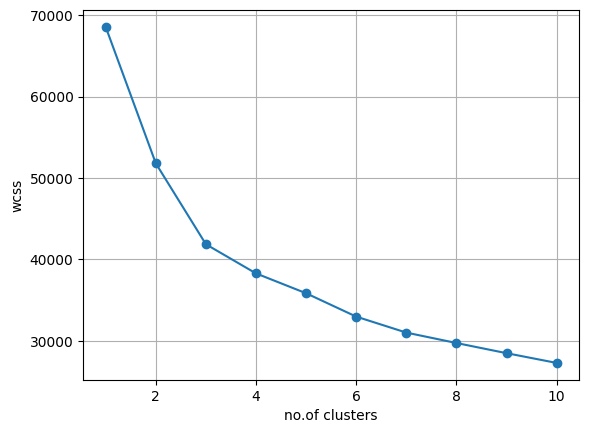

In [662]:
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('no.of clusters')
plt.ylabel('wcss')
plt.grid()

We can see after 3 no.of clusters the slope is getting decress raidly. so according to concept of elbow point we will consider 3 clusters

In [663]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(scaled_data)
cluster_assignment = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [664]:
set(cluster_assignment)

{0, 1, 2}

In [665]:
df['furnishing_type'] = cluster_assignment

In [666]:
df[['furnishDetails', 'furnishing_type']].sample(5)

,furnishDetails,furnishing_type
310,"['1 Fan', '1 Exhaust Fan', '1 Geyser', '5 Ligh...",1
3681,[],1
2978,"['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Ge...",0
2625,"['1 Wardrobe', '1 Fan', '1 Geyser', '1 Light',...",1
422,"['1 Wardrobe', '4 Geyser', 'No AC', 'No Bed', ...",1


In [667]:
#2 = furnished
#0 = semi furnished
#1 = unfurnished


In [668]:
df=df.iloc[:, :-19]

In [669]:
df['furnishing_type'] = cluster_assignment

In [670]:
df.head(2)

,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,servant room,pooja room,study room,others,store room,furnishing_type
0,ireo victory valley,2.99,sector 67,11832.0,2527.0,flat,Super Built up area 2527(234.77 sq.m.)Built Up...,2527.040803,2200.0,2100.0,3.0,3.0,3,servant room,4.0,East,relatively new,"['AIPL Joy Street Mall', 'Golf Course Extensio...","['3 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 St...","['Security / Fire Alarm', 'Intercom Facility',...",1,0,0,0,0,0
1,signature global park,0.58,sohna road,7056.0,822.0,flat,Built Up area: 822 (76.37 sq.m.)Carpet area: 6...,NaN,822.0,600.0,2.0,2.0,2,not available,3.0,NaN,undefined,"['Sector 55-56 metro', 'Global city centre', '...",NaN,NaN,0,0,0,0,0,1


#Dealing with features

In [671]:
df['features'].sample(1)

2275    ['Feng Shui / Vaastu Compliant', 'Private Gard...
Name: features, dtype: object

In [672]:
df.columns


Index(['society', 'price', 'sector', 'price_per_sqft', 'area', 'property_type',
       'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'floorNum',
       'facing', 'agePossession', 'nearbyLocations', 'furnishDetails',
       'features', 'servant room', 'pooja room', 'study room', 'others',
       'store room', 'furnishing_type'],
      dtype='object')

In [673]:
df['features'].isna().sum()

638

In [674]:
apartment = pd.read_csv("/content/drive/MyDrive/campus x /Capstone Project /appartments.csv")

In [675]:
apartment.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


We can see there are 638 missing values in feature column

To fill the missing values in features we will join our original dataset with apartment dataset

In [676]:
temp_df = df[df['features'].isna()][['society', 'features']]

In [677]:
temp_df.head()

,society,features
1,signature global park,NaN
2,chd avenue,NaN
5,ansal height 86,NaN
7,NaN,NaN
16,emaar mgf emerald floors,NaN


In [678]:
apartment['PropertyName'] = apartment['PropertyName'].str.strip().str.lower()

In [679]:
apartment.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,smartworld one dxp,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,m3m crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


In [680]:
temp_df.merge(apartment, how = 'left', left_on = 'society', right_on = 'PropertyName')[['society', 'features', 'TopFacilities']].head()

,society,features,TopFacilities
0,signature global park,NaN,"['Swimming Pool', 'Gazebo', 'Amphitheatre', 'B..."
1,chd avenue,NaN,NaN
2,ansal height 86,NaN,NaN
3,NaN,NaN,NaN
4,emaar mgf emerald floors,NaN,NaN


In [681]:
x = temp_df.merge(apartment, how = 'left', left_on = 'society', right_on = 'PropertyName')[['TopFacilities']]

In [682]:
df.loc[temp_df.index,'features'] = x.values

In [683]:
df['features'].isna().sum()

484

we have reduced null values by 154

In [684]:
df['features'] = df['features'].str.strip()

In [685]:
#like furnishing details we will create multiple columns using feature column and finally we will categorize rows using KMeans clustering

In [686]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [687]:
#convert string representaion of list to actual list in features column
df['features'] = df['features'].apply(lambda x : ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

In [688]:
type(df.loc[1, 'features'])

list

In [689]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(df['features'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [690]:
features_df = pd.DataFrame(mlb.fit_transform(df['features']), columns  = mlb.classes_)

In [691]:
#lets try to apply KMeans clustering
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(features_df)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

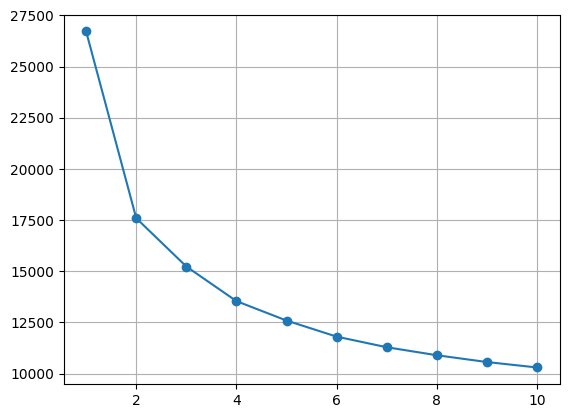

In [692]:
plt.plot(range(1,11), wcss, marker = 'o')
plt.grid()

In [693]:
#lets consider 2 clusters
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(features_df)
cluster_assignment = kmeans.predict(features_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [694]:
features_df['features_category'] = cluster_assignment

In [695]:
features_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,...,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area,features_category
2258,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1654,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0
367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [696]:
# we can see it making only 2 clusters
#0=for multiple features available
#1=for less numbers of features available

we will take other approach.
we will assign luxary score according to availability of features

In [697]:
features_df.columns

Index(['24/7 Power Backup', '24/7 Water Supply', '24x7 Security', 'ATM',
       'Aerobics Centre', 'Air Hockey', 'Airy Rooms', 'Amphitheatre',
       'Automated Car Wash', 'Badminton Court',
       ...
       'Volley Ball Court', 'Waiting Lounge', 'Waste Disposal',
       'Water Softener Plant', 'Water Storage', 'Water purifier',
       'Water softening plant', 'Wi-Fi Connectivity', 'Yoga/Meditation Area',
       'features_category'],
      dtype='object', length=131)

In [698]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [699]:
weights.values()

dict_values([8, 4, 7, 4, 6, 8, 7, 7, 8, 9, 7, 7, 7, 8, 9, 8, 6, 6, 6, 9, 6, 7, 9, 5, 9, 9, 8, 7, 7, 6, 5, 7, 6, 5, 8, 8, 7, 6, 5, 7, 7, 7, 10, 6, 8, 8, 8, 9, 7, 6, 7, 9, 7, 8, 6, 8, 8, 8, 7, 6, 7, 5, 4, 9, 7, 7, 8, 7, 8, 8, 7, 7, 8, 9, 7, 7, 7, 8, 8, 8, 9, 9, 9, 8, 6, 7, 7, 6, 7, 9, 9, 8, 9, 8, 8, 5, 9, 7, 9, 9, 7, 7, 7, 7, 7])

In [700]:
features_df = features_df[list(weights.keys())]*weights.values()

In [701]:
features_df['luxary_score'] = features_df.sum(axis = 1)

In [702]:
features_df.head()

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Airy Rooms,Amphitheatre,Badminton Court,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Billiards,Bowling Alley,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,...,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Theatre,Toddler Pool,Valet Parking,Video Door Security,Visitor Parking,Water Softener Plant,Water Storage,Water purifier,Yoga/Meditation Area,luxary_score
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,37
1,0,0,0,0,0,0,7,7,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,7,58
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,...,9,9,8,0,7,0,0,0,0,9,0,0,0,8,0,0,0,0,0,7,0,7,7,0,174
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,7,0,0,49


In [703]:
features_df.isna().sum()

24/7 Power Backup       0
24/7 Water Supply       0
24x7 Security           0
ATM                     0
Aerobics Centre         0
                       ..
Water Softener Plant    0
Water Storage           0
Water purifier          0
Yoga/Meditation Area    0
luxary_score            0
Length: 106, dtype: int64

In [704]:
features_df[features_df['luxary_score'].isna()]

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Airy Rooms,Amphitheatre,Badminton Court,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Billiards,Bowling Alley,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,...,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Theatre,Toddler Pool,Valet Parking,Video Door Security,Visitor Parking,Water Softener Plant,Water Storage,Water purifier,Yoga/Meditation Area,luxary_score


In [705]:
features_df['luxary_score'].shape,features_df['luxary_score'].isnull().sum()

((3808,), 0)

In [706]:
df.reset_index(inplace = True)
df['luxary_score'] = features_df['luxary_score']
df['luxary_score'].isna().sum()

0

In [707]:
df[df['luxary_score'].isna()].iloc[:, -15:].index

Int64Index([], dtype='int64')

In [708]:
features_df.index

RangeIndex(start=0, stop=3808, step=1)

In [709]:
df.index

RangeIndex(start=0, stop=3808, step=1)

In [710]:
df.reset_index(inplace = True)

In [711]:
df.columns

Index(['level_0', 'index', 'society', 'price', 'sector', 'price_per_sqft',
       'area', 'property_type', 'areaWithType', 'super_built_up_area',
       'built_up_area', 'carpet_area', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'furnishDetails', 'features', 'servant room',
       'pooja room', 'study room', 'others', 'store room', 'furnishing_type',
       'luxary_score'],
      dtype='object')

In [712]:
df.drop(columns = ['nearbyLocations','furnishDetails','features','additionalRoom'],inplace=True)

In [713]:
df.shape

(3808, 25)

In [714]:
df.to_csv('gurgaon_properties_cleaned_v2.csv', index = False)